In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [8]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'), 
    Dense(16, activation='relu'), 
    Dense(10, activation='softmax'), 
])

In [9]:
# Print the model summary

model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.0717539 ,  0.03975029, -0.0456721 , ...,  0.01057744,
         -0.06145339, -0.01964337],
        [-0.06360607, -0.03921789, -0.03893198, ...,  0.02239729,
          0.05391476,  0.06189434],
        [ 0.04185583, -0.04467649,  0.02472329, ..., -0.0795499 ,
         -0.06336144,  0.05317125],
        ...,
        [ 0.07952358,  0.06657818, -0.06670594, ...,  0.04989217,
         -0.00314823, -0.05365423],
        [-0.00946862, -0.04629865,  0.00699617, ..., -0.04445489,
         -0.03390669,  0.01857391],
        [-0.02309011,  0.06376009, -0.0311475 , ...,  0.00725094,
          0.07508536,  0.00680937]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[-0.1836326 , -0.03558159,  0.06041503,  0.009

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [15]:
# alternative you can add separately the softmax activation as well as you can name the layers


# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'), 
    Dense(16, activation='relu'), 
    Dense(10),
    Softmax() 
])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [21]:
# Build the Sequential convolutional neural network model

# 16 channels 3x3 kernel
# Max Pooling 3x3
# Flatten with a fully connected layer of 10 neurons and softmax activation function
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [22]:
# Print the model summary

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Build the Sequential convolutional neural network model

# Adding a padding layer , you can also add 'strides=2' for example
# 16 channels 3x3 kernel
# Max Pooling 3x3
# Flatten with a fully connected layer of 10 neurons and softmax activation function
model = Sequential([
    Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


you can also add the data_format='channel_first' where the defaul is 'channel_last'. In this case, we should change the input shape from eg `(28,28,1)` to `(1,28,28)` and we should add it to the MaxPooling2D

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [27]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam', #sgd etc
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy


In [ ]:
# parametrize the optimizer or the accuracy

opt = tf.keras.optimizers.Adam(learning_rate=0.005)

acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

***
<a id="coding_tutorial_4"></a>
## The fit method

In [36]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [29]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [33]:
# Print the shape of the training data

print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [41]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [42]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

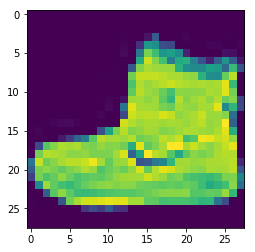

label: Ankle boot


In [43]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}')

#### Build the CNN Model

In [44]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

#### Complie the Model

In [49]:
model.compile(optimizer='adam', #sgd etc
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### Fit the model

In [50]:
train_images[...,np.newaxis].shape

(60000, 28, 28, 1)

In [52]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 51s 858us/sample - loss: 1.2626 - accuracy: 0.6541
Epoch 2/8
60000/60000 [==============================] - 51s 843us/sample - loss: 1.0360 - accuracy: 0.6748
Epoch 3/8
60000/60000 [==============================] - 50s 835us/sample - loss: 0.9219 - accuracy: 0.6908
Epoch 4/8
60000/60000 [==============================] - 50s 837us/sample - loss: 0.8543 - accuracy: 0.7028
Epoch 5/8
60000/60000 [==============================] - 50s 837us/sample - loss: 0.8096 - accuracy: 0.7139
Epoch 6/8
60000/60000 [==============================] - 49s 823us/sample - loss: 0.7762 - accuracy: 0.7214
Epoch 7/8
60000/60000 [==============================] - 52s 858us/sample - loss: 0.7496 - accuracy: 0.7292
Epoch 8/8
60000/60000 [==============================] - 49s 825us/sample - loss: 0.7284 - accuracy: 0.7357


#### Plot training history

In [54]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df

,loss,accuracy
0,1.262607,0.654083
1,1.036043,0.674767
2,0.921876,0.690783
3,0.854287,0.702800
4,0.809606,0.713883
5,0.776156,0.721383
6,0.749587,0.729217
7,0.728448,0.735683


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

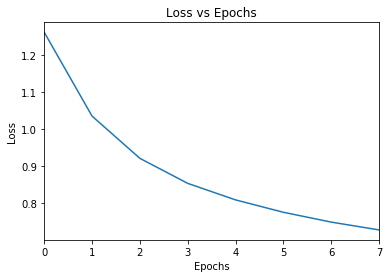

In [55]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'Epochs')]

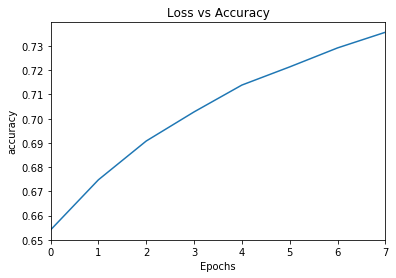

In [57]:
# Make a plot for the accuracy


accuracy_plot = df.plot(y='accuracy', title='Loss vs Accuracy', legend=False)
accuracy_plot.set(xlabel='Epochs', ylabel='accuracy')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [58]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [63]:
# Evaluate the model

model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 6s - loss: 0.5551 - accuracy: 0.7299


[0.7354763784885406, 0.7299]

#### Make predictions from the model

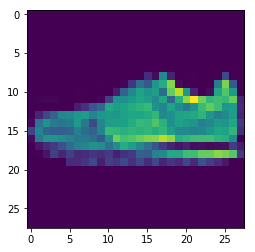

Label: Sneaker


In [71]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [72]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f'Model Prediction: {labels[np.argmax(predictions)]}')

Model Prediction: Sneaker
